In [1]:
!pip install python-terrier

     |████████████████████████████████| 97 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 18.0 MB/s 
     |████████████████████████████████| 69 kB 8.3 MB/s 
     |████████████████████████████████| 297 kB 55.8 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 72 kB 956 kB/s 
     |████████████████████████████████| 596 kB 48.4 MB/s 
     |████████████████████████████████| 126 kB 38.9 MB/s 
     |████████████████████████████████| 294 kB 47.4 MB/s 
     |████████████████████████████████| 6.4 MB 7.5 MB/s 
     |████████████████████████████████| 1.2 MB 60.9 MB/s 
     |████████████████████████████████| 287 kB 77.3 MB/s 
     |████████████████████████████████| 59 kB 8.8 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.1-py3-none-

In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import pyterrier as pt

if not pt.started():
  pt.init()

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [3]:
dataset = pt.datasets.get_dataset('irds:nfcorpus/dev/video')
topics = dataset.get_topics()
qrels = dataset.get_qrels()

[INFO] If you have a local copy of https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/49c061fbadc52ba4d35d0e42e2d742fd
[INFO] [starting] https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz
[INFO] [finished] https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: [00:03] [31.0MB] [8.94MB/s]


There are multiple query fields available: ('title', 'desc'). To use with pyterrier, provide variant or modify dataframe to add query column.


In [4]:
topics.head()

,qid,title,desc
0,PLAIN-2429,diverticulosis : when our most common gut diso...,more than two-thirds of americans over age 60 ...
1,PLAIN-2439,from table to able : combating disabling disea...,dr. greger has scoured the world 's scholarly ...
2,PLAIN-2449,how to make your own fruit and vegetable wash,commercial fruit and vegetable washes fail to ...
3,PLAIN-2459,how to prevent a stroke,insufficient intake of fiber-rich foods may le...
4,PLAIN-2469,"if white rice is linked to diabetes , what abo...",protein consumption can exacerbate the insulin...


In [5]:
topics.columns

Index(['qid', 'title', 'desc'], dtype='object')

In [6]:
qrels.head()

,qid,docno,label,iteration
0,PLAIN-2429,MED-974,3,0
1,PLAIN-2429,MED-975,3,0
2,PLAIN-2429,MED-976,3,0
3,PLAIN-2429,MED-977,3,0
4,PLAIN-2429,MED-978,3,0


In [8]:
indexer = pt.IterDictIndexer('./indices/nfcorps')
index_ref = indexer.index(dataset.get_corpus_iter(), fields=["title"])

nfcorpus/dev/video documents:   0%|          | 0/5371 [00:00<?, ?it/s]

In [9]:
index = pt.IndexFactory.of(index_ref)
print('The below statistics provide the information about the index created on "TITLE" field')
print(index.getCollectionStatistics().toString())

The below statistics provide the information about the index created on "TITLE" field
Number of documents: 5371
Number of terms: 5077
Number of postings: 57281
Number of fields: 1
Number of tokens: 58358
Field names: [title]
Positions:   false



In [10]:
## Printing all the terms in our index
for all_terms in index.getLexicon():
  print(all_terms.getKey())

Streaming output truncated to the last 5000 lines.
2246
235
24
25
2512
26
264
27
277
28
29
292
296
298
3
30
300
306
31
3100
3181
32
33
344
356
36
38
39
396
3gal
3t3
4
40
4000
43
4454
45
468
47
491
4998
4glcnac
5
50
50th
52
53
534
546
55
59
6
60
600
65
67
7
70
700
701
74
76
77
8
80
82
84
846
8612
883
9
90
906
966
989
99th
9ala
9h
aarp
abattoir
abc
abdomin
aberr
abil
abnorm
abo
aborigin
abras
absenc
absorb
absorpt
abund
abus
ac
academ
academi
acai
acat1
acceler
accept
accid
accident
accord
account
accru
accumul
accuraci
acephala
acet
acetaldehyd
acetaminophen
acetyl
achil
acid
acidophilu
acidosi
acipimox
acn
acneform
acquir
across
acrylamid
act
actinidia
action
activ
acuiti
acupressur
acupunctur
acut
ad
adapt
addict
addit
adduct
adenocarcinoma
adenoma
adenomat
adenoviru
adequaci
adhatoda
adhd
adher
adhes
adipocyt
adipogen
adipokin
adiponectin
adipos
adjunct
adjust
adjuv
administ
administr
admiss
adolesc
adopt
adren
adrenocort
adrenoreceptor
adriat
adult
adulter
adulthood
advanc
advantag


In [11]:
### Searching for specific term in our index and its frequency
print('The number of occurance of term "chemic" is',index.getLexicon()["chemic"].getFrequency())
print('The number of occurance of term "wisdom" is',index.getLexicon()["wisdom"].getFrequency())
print('The number of occurance of term "fruit" is',index.getLexicon()["fruit"].getFrequency())

The number of occurance of term "chemic" is 29
The number of occurance of term "wisdom" is 1
The number of occurance of term "fruit" is 124


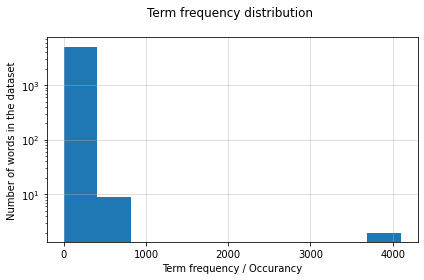

In [12]:
termfreq=defaultdict(list)
for id in index.getLexicon():
  term=id.getKey()
  termfreq["Terms"].append(id.getKey())
  termfreq["Frequency"].append(id.getValue().getFrequency())

term_frequency=pd.DataFrame(termfreq)  
term_frequency.shape
plt.hist(term_frequency["Frequency"],log=True)
plt.xlabel("Term frequency / Occurancy")
plt.ylabel("Number of words in the dataset")
plt.title("Term frequency distribution \n")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Our index has now been created and now in the later part of notebook we will be exploring the retrieval using BatchRetrieve method of PyTerrier

BatchRetrieve is one of the most commonly used PyTerrier objects. It represents a retrieval transformation, in which queries are mapped to retrieved documents. BatchRetrieve uses a pre-existing Terrier index data structure, typically saved on disk.

In our previous cell we have stored all our indices to "index" variable

In [13]:
## Evaluation using Mean Average Precision  and Mean Reciprocal Rank
tf = pt.BatchRetrieve(index_ref, wmodel="Tf")
tf_idf = pt.BatchRetrieve(index_ref, wmodel="TF_IDF")
bm25 = pt.BatchRetrieve(index_ref, wmodel="BM25")
pl2 = pt.BatchRetrieve(index_ref, wmodel="PL2")
dfr_bm25 = pt.BatchRetrieve(index, wmodel='DFR_BM25')
DI = pt.BatchRetrieve(index, wmodel="Dl")
resultant = pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, eval_metrics=["map","recip_rank"],
              names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'])
pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, eval_metrics=["map","recip_rank"],
              names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'])

/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)
/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)


,name,map,recip_rank
0,TF,0.047790,0.286471
1,TF_IDF,0.068373,0.406899
2,BM25,0.068479,0.401989
3,PL2,0.068365,0.404578
4,DFR_BM25,0.068228,0.400360
5,DI,0.042927,0.274708


In [ ]:
resultant.to_csv('resultant.csv')

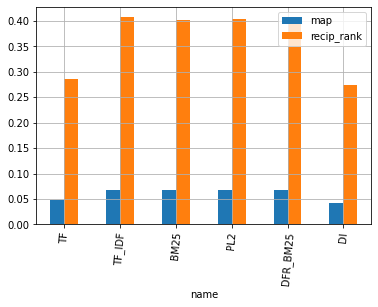

In [14]:
resultant.plot.bar(x='name')
plt.xticks(rotation = 85)
plt.grid(True)
plt.legend(loc=1)

In the previous cell we have used Mean Average Precision and Mean Reciprocal Rank. Further, we will be evaluating the number of document retrieved, relevent document retrieved.

In [15]:

document_resultant = pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, eval_metrics=["num_ret","num_rel","num_rel_ret"],
              names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'])
print("\n")
print("--------------------------------------------------------------------")

print("num_ret = Number of retrieved documents \nnum_rel = Number of relevant documents \nnum_rel_ret = Number of relevant documents retrieved")
pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, eval_metrics=["num_ret","num_rel","num_rel_ret"],
              names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'])



/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)




--------------------------------------------------------------------
num_ret = Number of retrieved documents 
num_rel = Number of relevant documents 
num_rel_ret = Number of relevant documents retrieved


,name,num_ret,num_rel,num_rel_ret
0,TF,26071.0,2987.0,728.0
1,TF_IDF,26071.0,2987.0,728.0
2,BM25,26071.0,2987.0,728.0
3,PL2,26071.0,2987.0,728.0
4,DFR_BM25,26071.0,2987.0,728.0
5,DI,26071.0,2987.0,728.0


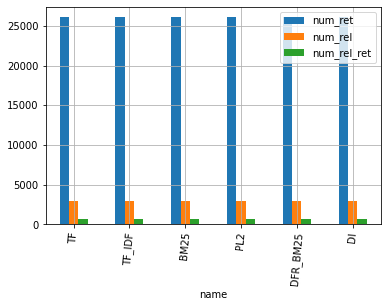

In [ ]:
document_resultant.plot.bar(x='name')
plt.xticks(rotation = 85)
plt.grid(True)

**Evaluation using Precision and Recall**

    1) Precision

In [ ]:
Precision = pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, eval_metrics=["P_5", "P_10", "P_15"],
              names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'])

pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, eval_metrics=["P_5", "P_10", "P_15"],
              names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'])



/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)


,name,P_5,P_10,P_15
0,TF,0.145098,0.106863,0.086928
1,TF_IDF,0.217647,0.159804,0.135948
2,BM25,0.217647,0.161765,0.135294
3,PL2,0.217647,0.158824,0.137255
4,DFR_BM25,0.217647,0.160784,0.135948
5,DI,0.137255,0.098039,0.083660


In [ ]:
Precision.to_csv('Precision.csv')

In [ ]:
Recall.to_csv('recall.csv')

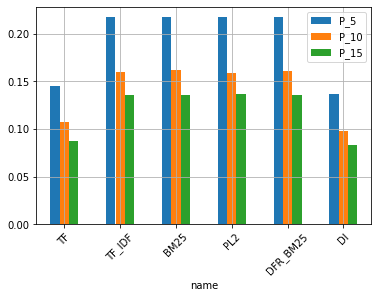

In [ ]:
Precision.plot.bar(x='name')
plt.xticks(rotation = 45)
plt.grid(True)

    2) Recall

In [ ]:
Recall  = pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, 
                        eval_metrics=["recall_5", "recall_10", "recall_15"],
                        names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'])

pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, 
              eval_metrics=["recall_5", "recall_10", "recall_15"],
              names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'])

/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)


,name,recall_5,recall_10,recall_15
0,TF,0.039520,0.070098,0.080586
1,TF_IDF,0.069985,0.092744,0.108680
2,BM25,0.069886,0.093540,0.108554
3,PL2,0.069849,0.092368,0.108654
4,DFR_BM25,0.069886,0.093080,0.108687
5,DI,0.035126,0.055181,0.066625


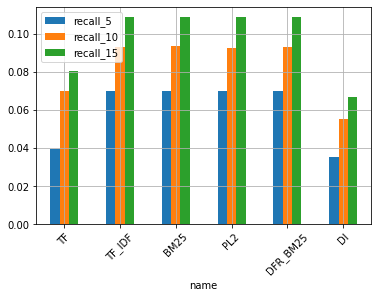

In [ ]:
Recall.plot.bar(x='name')
plt.xticks(rotation = 45)
plt.grid(True)

**Significance Testing and Correctness**

In Significance testing we will be considering one of the transformer as our baseline and rest of the transformers are evaluated 

In [ ]:
pt.Experiment([tf, tf_idf, bm25, pl2,dfr_bm25,DI], dataset.get_topics('title'), qrels, 
              eval_metrics=["map","recip_rank","P_5","recall_5"],
              names=['TF', 'TF_IDF', 'BM25', 'PL2','DFR_BM25','DI'],
              baseline=0)

/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)


,name,map,recip_rank,P_5,recall_5,map +,map -,map p-value,recip_rank +,recip_rank -,recip_rank p-value,P_5 +,P_5 -,P_5 p-value,recall_5 +,recall_5 -,recall_5 p-value
0,TF,0.047790,0.286471,0.145098,0.039520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TF_IDF,0.068373,0.406899,0.217647,0.069985,57.0,20.0,0.000016,42.0,14.0,0.000126,32.0,5.0,0.000003,32.0,5.0,0.008873
2,BM25,0.068479,0.401989,0.217647,0.069886,57.0,20.0,0.000015,42.0,14.0,0.000151,33.0,6.0,0.000004,33.0,6.0,0.009233
3,PL2,0.068365,0.404578,0.217647,0.069849,57.0,20.0,0.000015,42.0,14.0,0.000149,33.0,6.0,0.000004,33.0,6.0,0.009314
4,DFR_BM25,0.068228,0.400360,0.217647,0.069886,57.0,20.0,0.000016,42.0,14.0,0.000173,33.0,6.0,0.000004,33.0,6.0,0.009233
5,DI,0.042927,0.274708,0.137255,0.035126,30.0,49.0,0.124637,32.0,36.0,0.698698,14.0,18.0,0.574146,14.0,18.0,0.192458


**Manual Evaluation by sending Input to the search engine**

In [ ]:
TF_search=tf.search('Apple is the best')
TF_search.head()

,qid,docid,docno,rank,score,query
0,1,5018,MED-5019,0,3.0,Apple is the best
1,1,48,MED-49,1,2.0,Apple is the best
2,1,1791,MED-1792,2,2.0,Apple is the best
3,1,2490,MED-2491,3,2.0,Apple is the best
4,1,25,MED-26,4,1.0,Apple is the best


In [ ]:
TF_IDF_search = tf_idf.search('Apple is the best')
TF_IDF_search.head()

,qid,docid,docno,rank,score,query
0,1,5018,MED-5019,0,7.041093,Apple is the best
1,1,4839,MED-4840,1,6.939633,Apple is the best
2,1,48,MED-49,2,6.363050,Apple is the best
3,1,2490,MED-2491,3,6.363050,Apple is the best
4,1,4511,MED-4512,4,6.096574,Apple is the best


In [ ]:
BM25 = bm25.search('Apple is the best')
BM25.head()

,qid,docid,docno,rank,score,query
0,1,5018,MED-5019,0,12.834756,Apple is the best
1,1,4839,MED-4840,1,12.512161,Apple is the best
2,1,48,MED-49,2,11.598795,Apple is the best
3,1,2490,MED-2491,3,11.598795,Apple is the best
4,1,4511,MED-4512,4,10.992124,Apple is the best


In [ ]:
PL2 = pl2.search('Apple is the best')
PL2.head()

,qid,docid,docno,rank,score,query
0,1,5018,MED-5019,0,6.586781,Apple is the best
1,1,4839,MED-4840,1,6.349354,Apple is the best
2,1,48,MED-49,2,5.801119,Apple is the best
3,1,2490,MED-2491,3,5.801119,Apple is the best
4,1,4511,MED-4512,4,5.537713,Apple is the best


In [ ]:
DFR_BM25 = dfr_bm25.search('Apple is the best')
DFR_BM25.head()

,qid,docid,docno,rank,score,query
0,1,5018,MED-5019,0,5.830349,Apple is the best
1,1,4839,MED-4840,1,5.662700,Apple is the best
2,1,48,MED-49,2,5.263430,Apple is the best
3,1,2490,MED-2491,3,5.263430,Apple is the best
4,1,4511,MED-4512,4,4.984085,Apple is the best


In [ ]:
di = DI.search('Apple is the best')
di.head()

,qid,docid,docno,rank,score,query
0,1,4579,MED-4580,0,17.0,Apple is the best
1,1,1669,MED-1670,1,16.0,Apple is the best
2,1,1791,MED-1792,2,14.0,Apple is the best
3,1,2304,MED-2305,3,14.0,Apple is the best
4,1,3898,MED-3899,4,13.0,Apple is the best
